# Etapa da Análise Exploratória
Etapa da análise exploratória dos dados que foram extraídos da API.
> **Nota**: **Artigo no Medium** da etapa da `análise exploratória` desse sistema em português: [Análise de Sentimentos Sobre os Quadrinhos da Marvel (Parte 1) - Ingestão, EDA e Pré-processamento](https://medium.com/@guineves.py/c5a0e35bb586).

## Table of Contents
* [Pacotes](#1)
* [Análise Exploratória dos Dados](#2)
    * [Feature Engineering](#2.1)

<a name="1"></a>
## Pacotes
Pacotes que foram utilizados no sistema:
* [pandas](https://pandas.pydata.org/): é o principal pacote para manipulação de dados;
* [numpy](www.numpy.org): é o principal pacote para computação científica;
* [re](https://docs.python.org/3/library/re.html): fornece operações de correspondência de expressões regulares semelhantes às encontradas em Perl;
* [collections](https://docs.python.org/3/library/collections.html#collections): implementa tipos de dados de contêiner especializados, fornecendo alternativas aos contêineres integrados de uso geral do Python, dict, list, set e tuple;
* [nltk](https://www.nltk.org/): NLTK é uma plataforma líder para a construção de programas Python para trabalhar com dados de linguagem humana;
* [matplotlib](http://matplotlib.org): é uma biblioteca para plotar gráficos;
* [PIL](https://pillow.readthedocs.io/en/stable/): Python Imaging Library adiciona recursos de processamento de imagem ao seu interpretador Python;
* [wordcloud](https://pypi.org/project/wordcloud/): um pequeno gerador de nuvem de palavras em Python;
* [os](https://docs.python.org/3/library/os.html): módulo integrado, fornece uma maneira portátil de usar funcionalidades dependentes do sistema operacional;
* [sys](https://docs.python.org/3/library/sys.html): fornece acesso a algumas variáveis usadas ou mantidas pelo interpretador e a funções que interagem fortemente com o interpretador;
* [src](../src/): pacote com todos os códigos de todas as funções utilitárias criadas para esse sistema. Localizado dentro do diretório `../src/`.

In [74]:
import pandas as pd
import numpy as np

import os
import sys
PROJECT_ROOT = os.path.abspath( # Obtendo a versão absoluta normalizada do path raíz do projeto
    os.path.join( # Concatenando os paths
        os.getcwd(), # Obtendo o path do diretório dos notebooks
        os.pardir # Obtendo a string constante usada pelo OS para fazer referência ao diretório pai
    )
)
# Adicionando o path à lista de strings que especifica o path de pesquisa para os módulos
sys.path.append(PROJECT_ROOT)
from src.eda import *

> **Nota**: os códigos para as funções utilitárias utilizadas nesse sistema estão no script `eda.py` dentro do diretório `../src/`.

<a name="2"></a>
## Análise Exploratória dos Dados (EDA)
Estrutura do dataset:
* `id`: o identificador exclusivo do quadrinho.
* `title`: o título do comic.
* `description`: um resumo ou descrição do comic.
* `y`: o rótulo de sentimento alvo do comic.

Lendo o dataset do diretório `../data/raw/`, verificando a sua dimensão e projetando os primeiros 5 exemplos.

In [53]:
comics_data = pd.read_csv('../data/raw/comics_corpus.csv')
print(f'Shape do comics dataset: {comics_data.shape}')
comics_data.head()

Shape do comics dataset: (16927, 4)


,id,title,description,y
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action


Definindo a variável global com as cores para os plots que serão criados posteriormente.

In [56]:
COLORS = ['cornflowerblue', 'chocolate']

Contando os valores nulos.

In [59]:
print(f'Valores nulos no dataset dos comics:\n{comics_data.isnull().sum()}')

Valores nulos no dataset dos comics:
id             0
title          0
description    0
y              0
dtype: int64


Analisando a distribuição do rótulo alvo $y$.

In [62]:
comics_data['y'].value_counts()

y
action        10582
non-action     6345
Name: count, dtype: int64

Examinando o exemplo `index` para os exemplos do rótulo `label`.

In [67]:
index = 0
label = 'action'

comic_sentence = comics_data[comics_data['y'] == label]['description'].tolist()[index]
print(f'Rótulo do comic {index + 1} ---> {label}\n\nExemplo do comic {index + 1} ---> {comic_sentence}')

Rótulo do comic 1 ---> action

Exemplo do comic 1 ---> CHILDREN OF THE AFTERLIFE! While Kraven the Hunter stalks Jane Foster on Midgard and the newest Valkyrie fights for her soul on Perdita, Karnilla, the queen of Hel, works a miracle in the land of the dead! But Karnilla isn’t Hel’s only ruler—and now she’s upset the cosmic balance. There will be a price to pay…and Karnilla intends to ensure the Valkyries pay it.


Executando a análise descritiva. Fazemos a análise descritiva para ajudar identificar problemas, por exemplo, podemos observar que alguns dados da feature `title` estão duplicados, apenas 16855 exemplos únicos, de 16927. Mas, não vamos tratar isso, porque não vamos utilizar essa feature no modelo.

In [28]:
comics_data.iloc[:, 1:].describe().T

,count,unique,top,freq
title,16927,16855,100th Anniversary Special (2014) #1,5
description,16927,16927,CONCLUDING THIS CHILLING CHAPTER OF STEPHEN KI...,1
y,16927,2,action,10582


Analisando o tipo de cada feature e se há valores nulos.

In [31]:
comics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16927 entries, 0 to 16926
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           16927 non-null  int64 
 1   title        16927 non-null  object
 2   description  16927 non-null  object
 3   y            16927 non-null  object
dtypes: int64(1), object(3)
memory usage: 529.1+ KB


Plotando a distribuição e a contagem entre os 2 rótulos, o `action` e o `non-action`.

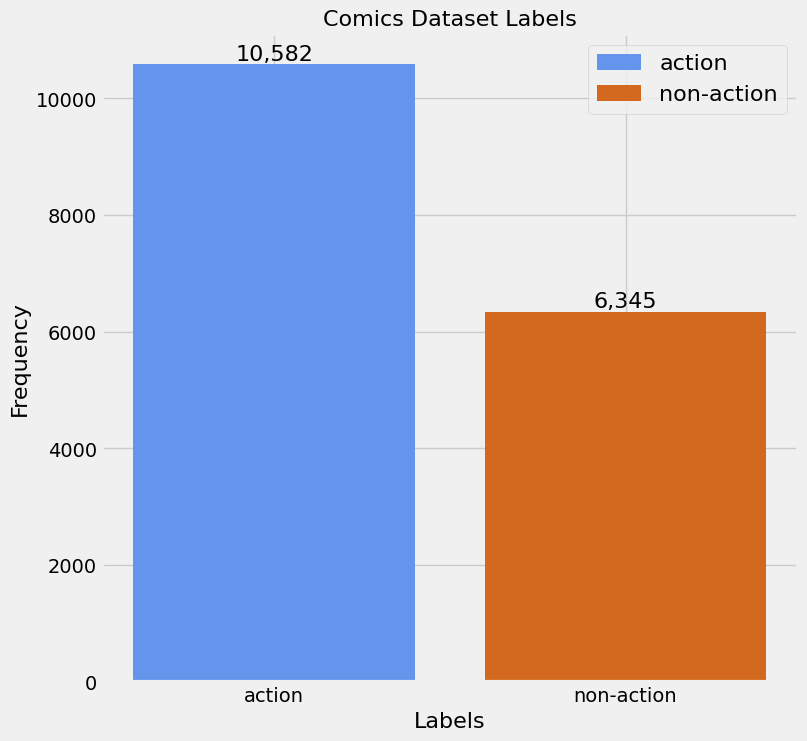

In [36]:
plot_bar(comics_data, colors=COLORS, name='comics_labels')

Plotando uma wordcloud com as palavras mais frequentes do corpus, ou seja, a feature `description`, que será utilizada no modelo. As stopwords foram excluídas, para visualizarmos apenas as palavras que realmente têm importância e significado.

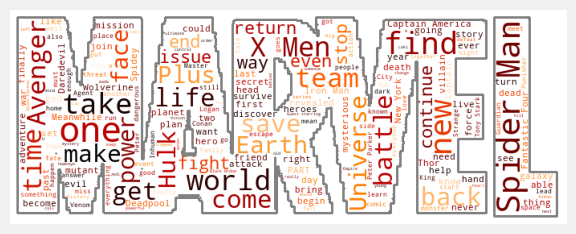

In [85]:
plot_wordcloud(comics_data, name='marvel_wordcloud')

Plotando a frequência das palavras que mais aparecem no corpus, exceto as stopwords, dividas entre os labels `action` e `non-action`.

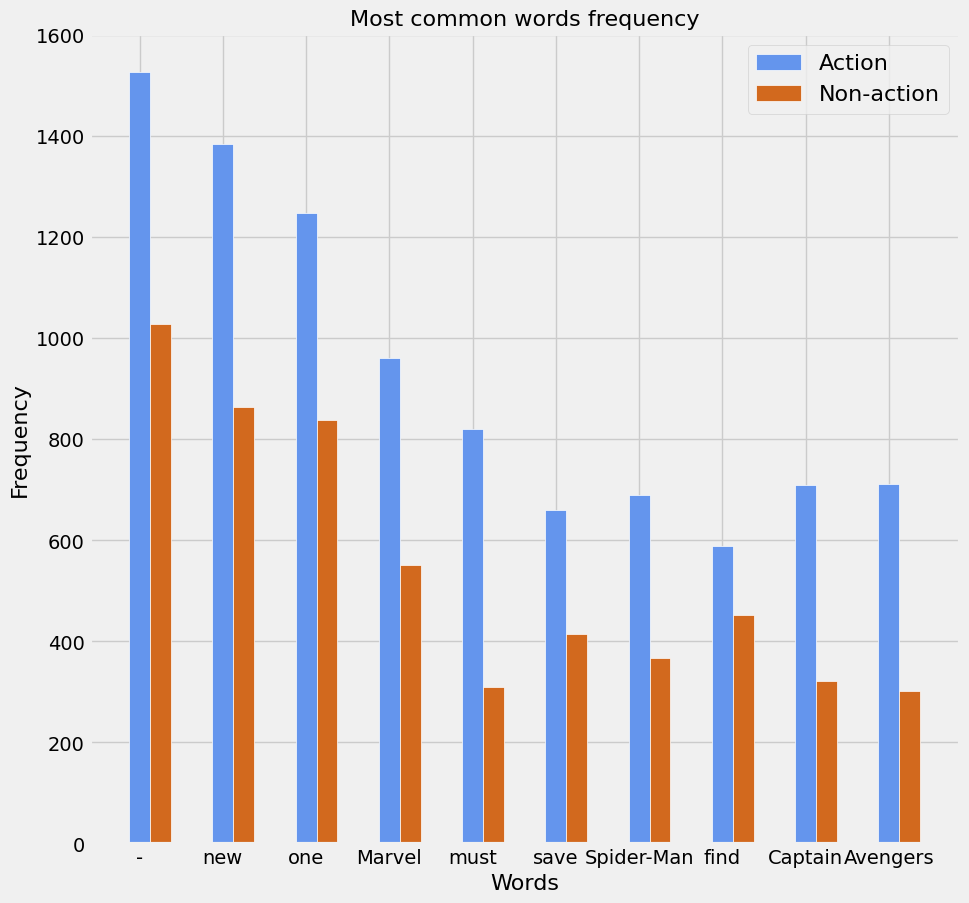

In [76]:
plot_word_frequency(
    comics_data,
    size=10,
    colors=COLORS,
    drop_stopwords=True,
    name='word_frequency'
)

<a name="2.1"></a>
## Feature Engineering
Criando algumas features para ajudar nos plots que serão criados a seguir, como o `tamanho do texto`, `contagem de palavras` na frase, `contagem de palavras em capslock` na frase e `contagem de palavras únicas` na frase.

In [50]:
comics_data['sentence_size'] = comics_data['description'].map(lambda x: len(x) - x.count(' '))
comics_data['word_count'] = comics_data['description'].map(lambda x: len(x.split()))
comics_data['capslock_word_count'] = comics_data['description'].map(lambda x: len(re.findall(r'\b[A-Z]+\b', x)))
comics_data['unique_word_count'] = comics_data['description'].map(lambda x: len(set(x.split())))
comics_data.head()

,id,title,description,y,sentence_size,word_count,capslock_word_count,unique_word_count
0,94799,Demon Days: Mariko (2021) #1 (Variant),IN THE SHADOW OF KIRISAKI MOUNTAIN?A SECRET HI...,non-action,478,95,21,83
1,93339,The Mighty Valkyries (2021) #3,CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,300,64,4,53
2,94884,The Mighty Valkyries (2021) #3 (Variant),CHILDREN OF THE AFTERLIFE! While Kraven the Hu...,action,300,64,4,53
3,93350,X-Corp (2021) #2,A SHARK IN THE WATER! After X-CORP’s shocking ...,non-action,247,52,9,47
4,94896,X-Corp (2021) #2 (Variant),A SHARK IN THE WATER! After X-CORP?s shocking ...,non-action,247,52,9,47


Plotando a comparação da distribuição entre o label `action` e o label `non-action` nas features que foram criadas.

Plotando a comparação da distribuição da feature `sentence_size`.

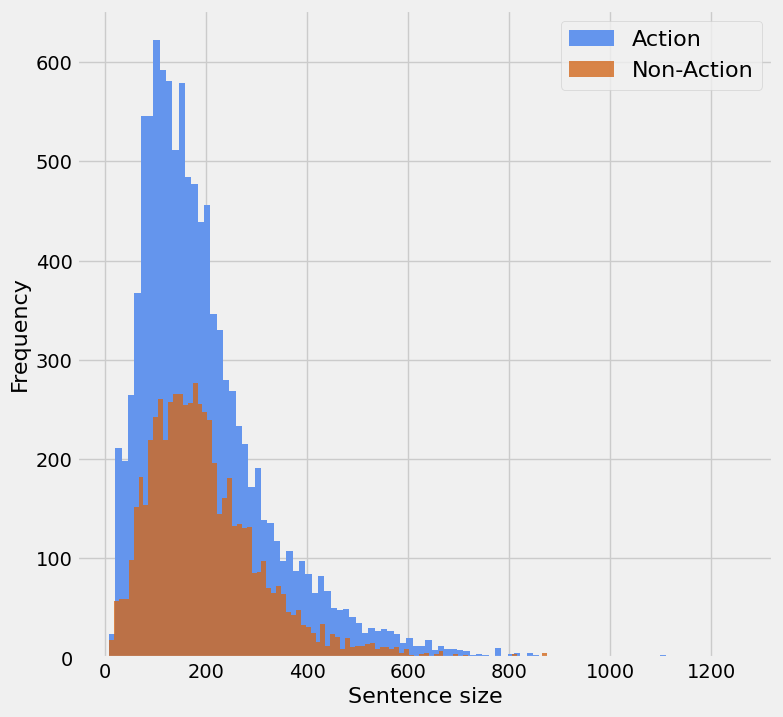

In [53]:
plot_hist_vs(
    comics_data, 
    'sentence_size', 
    xlabel='Sentence size',
    bins=100, 
    colors=COLORS,
    name='sentence_size'
)

Plotando a comparação da distribuição da feature `word_count`.

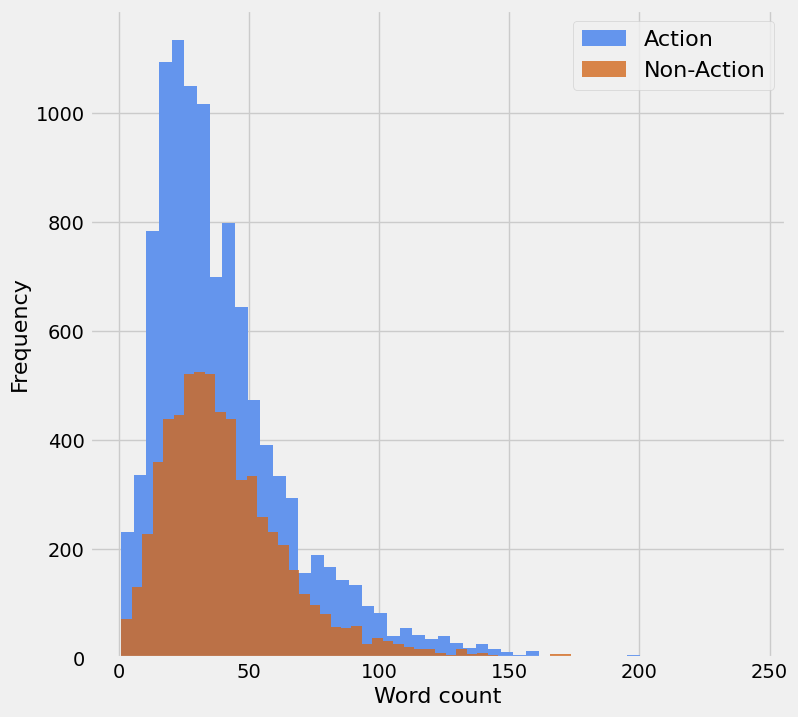

In [56]:
plot_hist_vs(
    comics_data,
    'word_count',
    xlabel='Word count',
    bins=50,
    colors=COLORS,
    name='word_count'
)

Plotando a comparação da distribuição da feature `capslock_word_count`.

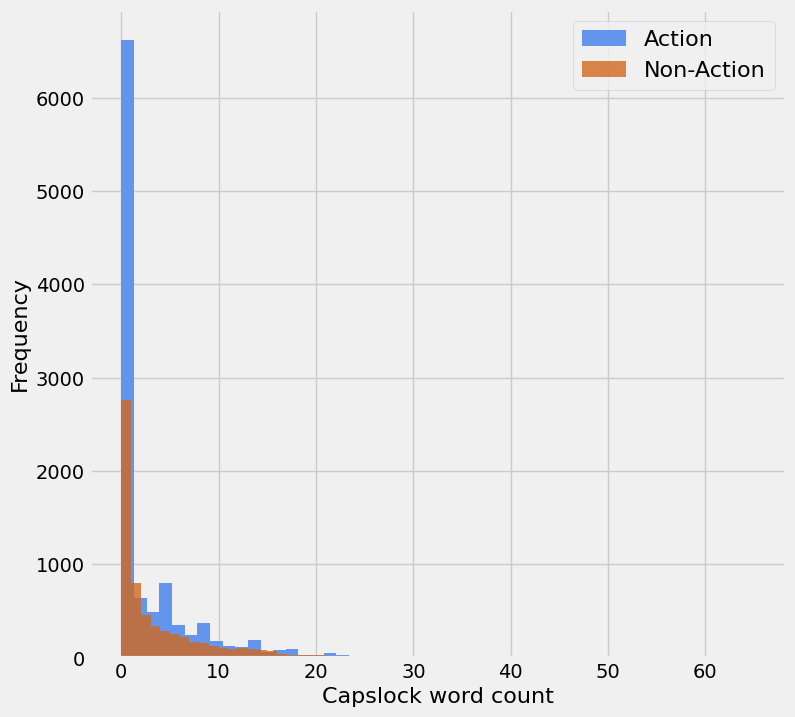

In [59]:
plot_hist_vs(
    comics_data, 
    'capslock_word_count', 
    xlabel='Capslock word count',
    bins=50,
    colors=COLORS,
    name='capslock_word_count'
)

Plotando a comparação da distribuição da feature `unique_word_count`.

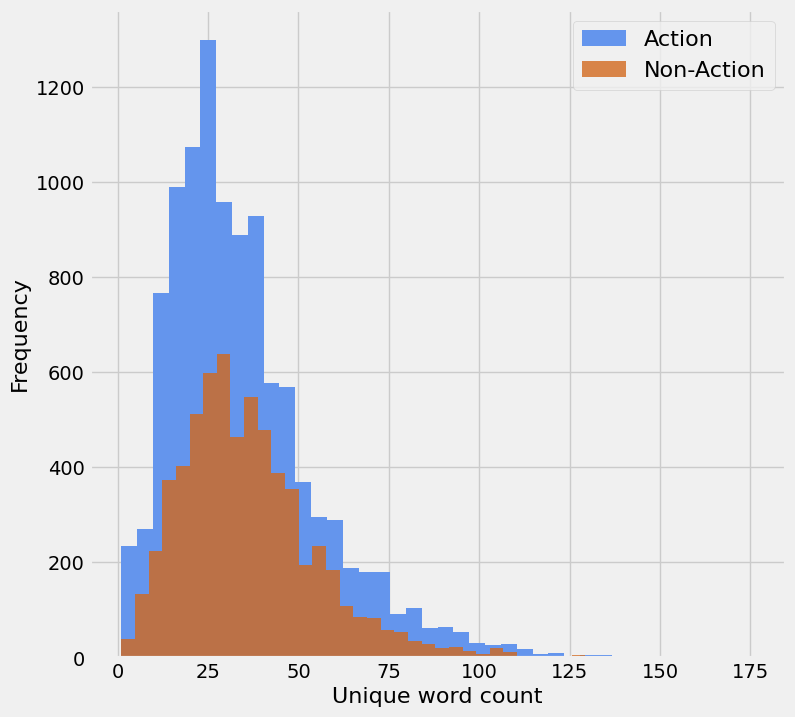

In [62]:
plot_hist_vs(
    comics_data, 
    'unique_word_count', 
    xlabel='Unique word count',
    bins=40,
    colors=COLORS,
    name='unique_word_count'
)